In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
mpl.rcParams['figure.figsize'] = (20,5)

In [3]:
# read orignal raw .csv file
members2019 = pd.read_csv('active-users-born-between-march-23-and-may-11-2019.fixed.augmented.csv')
members2020 = pd.read_csv('active-users-from-9M-600K-799K_during-lockdowns-2020.fixed.augmented.csv')

In [4]:
# replace french country names to english
members19 = members2019.replace(
    {'country': {"Cap Vert" : "Cape Verde Peninsula", "Ã‰quateur" : "Ecuador", "RÃ©union" : "Réunion", 
                 "Afghanistan" : "Afghanistan", "Albanie" : "Albania", "AlgÃ©rie" : "Algeria", 
                 "Samoa amÃ©ricaines" : "American Samoa", "Andorre" : "Andorra", "Angola" : "Angola",
                 "Antarctique" : "Antártica", "Argentine" : "Argentina", "ArmÃ©nie" : "Armenia", "Aruba" : "Aruba",
                 "Australie" : "Australia", "Autriche" : "Austria", "AzerbaÃ¯djan" : "Azerbaijan", "BahreÃ¯n" : "Bahrain",
                 "BiÃ©lorussie" : "Belarus", "Belgique" : "Belgium", "Benin" : "Benin", "Bermude" : "Bermuda", 
                 "Bhoutan" : "Bhutan", "Bolivie" : "Bolivia", "Bosnie et Herzegovine" : "Bosnia and Herzegovina", 
                 "BrÃ©sil" : "Brazil", "Brunei Darussalam" : "Brunei", "Bulgarie" : "Bulgaria", "Cambodge" : "Cambodia",
                 "Cameroun" : "Cameroon", "Canada" : "Canada", "ÃŽles Canaries" : "Canary Islands", 
                 "Iles Cayman" : "Cayman Islands", "Chili" : "Chile", "Chine" : "China", 
                 "St Martin" : "Collectivity of Saint Martin", "Colombie" : "Colombia", "Costa Rica" : "Costa Rica",
                 "Croatie" : "Croatia", "Chypre" : "Cyprus", "RÃ©publique tchÃ¨que" : "Czech Republic", 
                 "Danemark" : "Denmark", "Egypte" : "Egypt", "Le Salvador" : "El Salvador", 
                 "Equatorial Guinea" : "Equatorial Guinea", "Ã‰rythrÃ©e" : "Eritrea", "Estonie" : "Estonia", 
                 "Ã‰thiopie" : "Ethiopia", "Fidji" : "Fiji", "Finlande" : "Finland", "France" : "France",
                 "PolynÃ©sie FranÃ§aise" : "French Polynesia", "GÃ©orgie" : "Georgia", "Allemagne" : "Germany", 
                 "Ghana" : "Ghana", "GrÃ¨ce" : "Greece", "Groenland" : "Greenland", "Guadeloupe" : "Guadeloupe", 
                 "Guam" : "Guam", "Guernsey" : "Guernsey", "Honduras" : "Honduras", "Hong Kong" : "Hong Kong", 
                 "Hongrie" : "Hungary", "Islande" : "Iceland", "Inde" : "India", "IndonÃ©sie" : "Indonesia", 
                 "Iran" : "Iran", "Irak" : "Iraq", "Irlande" : "Ireland", "ÃŽle de Man" : "Isle of Man", 
                 "Israel" : "Israel", "Italie" : "Italy", "Cote D'Ivoire" : "Ivory Coast", "Japon" : "Japan", 
                 "Jersey" : "Jersey", "Jordanie" : "Jordan", "Kazakhstan" : "Kazakhstan", "Kenya" : "Kenya", 
                 "Kowait" : "Kuwait", "Lettonie" : "Latvia", "Liban" : "Lebanon", "Liechtenstein" : "Liechtenstein",
                 "Lituanie" : "Lithuania", "Luxembourg" : "Luxembourg", "Macau" : "Macau", "MacÃ©doine" : "Macedon", 
                 "Madagascar" : "Madagascar", "Malawi" : "Malawi",  "Malaisie" : "Malaysia", "Maldives" : "Maldives", 
                 "Malte" : "Malta", "Martinique" : "Martinique", "Mexique" : "Mexico", "Moldavie" : "Moldova", 
                 "Monaco" : "Monaco", "Mongolie" : "Mongolia", "Maroc" : "Morocco", "Mozambique" : "Mozambique", 
                 "Nepal" : "Nepal", "Pays-Bas" : "Netherlands", "Nouvelle CalÃ©donie" : "New Caledonia", 
                 "Nouvelle ZÃ©lande" : "New Zealand", "Nicaragua" : "Nicaragua", "Nigeria" : "Nigeria",
                 "CorÃ©e du Nord" : "North Korea", "NorvÃ¨ge" : "Norway", "Oman" : "Oman", "Pakistan" : "Pakistan",
                 "Panama" : "Panama", "Paraguay" : "Paraguay", "PÃ©rou" : "Peru", "Philippines" : "Philippines",
                 "Pologne" : "Poland", "Portugal" : "Portugal", "Puerto Rico" : "Puerto Rico", "Qatar" : "Qatar", 
                 "Roumanie" : "Romania", "Russie" : "Russia", "Rwanda" : "Rwanda", "St BarthÃ©lÃ©my" : "Saint Barthélemy",
                 "Saint Kitts et Nevis" : "Saint Kitts and Nevis", "Sainte Lucie" : "Saint Lucia", 
                 "Arabie Saoudite" : "Saudi Arabia", "SÃ©nÃ©gal" : "Senegal", "Serbie" : "Serbia", 
                 "Singapour" : "Singapore", "Slovaquie" : "Slovakia", "SlovÃ©nie" : "Slovenia", 
                 "Afrique du Sud" : "South Africa", "CorÃ©e du Sud" : "South Korea", "Espagne" : "Spain", 
                 "Sri Lanka" : "Sri Lanka", "SuÃ¨de" : "Sweden", "Suisse" : "Switzerland", "Syrie" : "Syria", 
                 "Taiwan" : "Taiwan", "Thailande" : "Thailand", "Trinidad et Tobago" : "Trinidad and Tobago", 
                 "Tunisie" : "Tunisia", "Turquie" : "Turkey", "Ukraine" : "Ukraine", 
                 "Ã‰mirats arabes unis" : "United Arab Emirates", "Royaume-Uni" : "United Kingdom", 
                 "Etats-Unis" : "United States", "ÃŽles Vierges (U.S.)" : "United States Virgin Islands", 
                 "Uruguay" : "Uruguay", "Uzbekistan" : "Uzbekistan", "Venezuela" : "Venezuela", "Viet Nam" : "Vietnam"}})

members20 = members2020.replace(
    {'country' : {"Afghanistan" : "Afghanistan", "Albanie" : "Albania", "AlgÃ©rie" : "Algeria", 
                  "Samoa amÃ©ricaines" : "American Samoa", "Andorre" : "Andorra", "Angola" : "Angola", 
                  "Anguilla" : "Anguilla", "Antarctique" : "Antártica", "Antigua et Barbuda" : "Antigua and Barbuda", 
                  "Argentine" : "Argentina", "ArmÃ©nie" : "Armenia", "Australie" : "Australia", "Autriche" : "Austria",
                  "AzerbaÃ¯djan" : "Azerbaijan", "BahreÃ¯n" : "Bahrain", "Bangladesh" : "Bangladesh", 
                  "Barbade" : "Barbados", "BiÃ©lorussie" : "Belarus", "Belgique" : "Belgium", "Belize" : "Belize", 
                  "Benin" : "Benin", "Bermude" : "Bermuda", "Bolivie" : "Bolivia", 
                  "Bosnie et Herzegovine" : "Bosnia and Herzegovina", "Botswana" : "Botswana", "BrÃ©sil" : "Brazil", 
                  "Brunei Darussalam" : "Brunei", "Bulgarie" : "Bulgaria", "Burkina Faso" : "Burkina Faso", 
                  "Cambodge" : "Cambodia", "Cameroun" : "Cameroon", "Canada" : "Canada", 
                  "ÃŽles Canaries" : "Canary Islands", "RÃ©publique centrafricaine" : "Central African Republic",
                  "Chili" : "Chile", "Chine" : "China", "Colombie" : "Colombia", "Congo" : "Congo", 
                  "Costa Rica" : "Costa Rica", "Croatie" : "Croatia", "Chypre" : "Cyprus", 
                  "RÃ©publique tchÃ¨que" : "Czech Republic", "Danemark" : "Denmark", "Dominique" : "Dominica", 
                  "RÃ©publique dominicaine" : "Dominican Republic", "East Timor" : "Timor-Leste", 
                  "Ã‰quateur" : "Ecuador", "Egypte" : "Egypt", "Estonie" : "Estonia", "Ã‰thiopie" : "Ethiopia", 
                  "ÃŽles FÃ©roÃ©" : "Faroe Islands", "Fidji" : "Fiji", "Finlande" : "Finland", "France" : "France", 
                  "PolynÃ©sie FranÃ§aise" : "French Polynesia", "GÃ©orgie" : "Georgia", "Allemagne" : "Germany",
                  "Ghana" : "Ghana", "Gibraltar" : "Gibraltar", "GrÃ¨ce" : "Greece", "Guadeloupe" : "Guadeloupe", 
                  "Guam" : "Guam", "Guatemala" : "Guatemala", "Guernsey" : "Guernsey", "Guyana" : "Guyana", 
                  "Guyane" : "Guyana", "Haiti" : "Haiti", "Honduras" : "Honduras", "Hong Kong" : "Hong Kong", 
                  "Hongrie" : "Hungary", "Islande" : "Iceland", "Inde" : "India", "IndonÃ©sie" : "Indonesia", 
                  "Iran" : "Iran", "Irak" : "Iraq", "Irlande" : "Ireland", "ÃŽle de Man" : "Isle of Man", 
                  "Israel" : "Israel", "Italie" : "Italy", "Cote D'Ivoire" : "Ivory Coast", "Jamaique" : "Jamaica",
                  "Japon" : "Japan", "Jersey" : "Jersey", "Jordanie" : "Jordan", "Kazakhstan" : "Kazakhstan",
                  "Kenya" : "Kenya", "Kowait" : "Kuwait", "Kirghizistan" : "Kyrgyzstan", "Laos" : "Laos",
                  "Lettonie" : "Latvia", "Liban" : "Lebanon", 
                  "Iles mineures Ã©loignÃ©es des Ã‰tats-Unis" : "Lesser Remote Islands of The United States",
                  "Libye" : "Libya", "Liechtenstein" : "Liechtenstein", "Lituanie" : "Lithuania", 
                  "Luxembourg" : "Luxembourg", "Macau" : "Macau", "MacÃ©doine" : "Macedon", "Madagascar" : "Madagascar",
                  "Malaisie" : "Malaysia", "Malte" : "Malta", "Iles Marshall" : "Marshall Islands", 
                  "Martinique" : "Martinique", "Mauritanie" : "Mauritania", "Maurice" : "Mauritius", "Mayotte" : "Mayotte",
                  "RÃ©union" : "Réunion", "Mexique" : "Mexico", "Moldavie" : "Moldova", "Monaco" : "Monaco",
                  "Montserrat" : "Montserrat", "Maroc" : "Morocco", "Myanmar" : "Myanmar", "Nepal" : "Nepal", 
                  "Pays-Bas" : "Netherlands", "Antilles nÃ©erlandaises" : "Netherlands Antilles", 
                  "Nouvelle CalÃ©donie" : "New Caledonia", "Nouvelle ZÃ©lande" : "New Zealand", "Nigeria" : "Nigeria", 
                  "CorÃ©e du Nord" : "North Korea", "ÃŽles Mariannes du Nord" : "Northern Mariana Islands", 
                  "NorvÃ¨ge" : "Norway", "Oman" : "Oman", "Pakistan" : "Pakistan", "Panama" : "Panama", "PÃ©rou" : "Peru", 
                  "Philippines" : "Philippines", "Pologne" : "Poland", "Portugal" : "Portugal", 
                  "Puerto Rico" : "Puerto Rico", "Qatar" : "Qatar", "Roumanie" : "Romania", "Russie" : "Russia",
                  "Rwanda" : "Rwanda", "St BarthÃ©lÃ©my" : "Saint Barthélemy", 
                  "Saint Kitts et Nevis" : "Saint Kitts and Nevis", "San Marino" : "San Marino", 
                  "Arabie Saoudite" : "Saudi Arabia", "SÃ©nÃ©gal" : "Senegal", "Serbie" : "Serbia", 
                  "Singapour" : "Singapore", "Slovaquie" : "Slovakia", "SlovÃ©nie" : "Slovenia", "Somalie" : "Somalia", 
                  "Afrique du Sud" : "South Africa", "CorÃ©e du Sud" : "South Korea", "Espagne" : "Spain", 
                  "Sainte Lucie" : "Saint Lucia", "SuÃ¨de" : "Sweden", "Suisse" : "Switzerland", "Taiwan" : "Taiwan", 
                  "Thailande" : "Thailand", "Trinidad et Tobago" : "Trinidad and Tobago", "Tunisie" : "Tunisia", 
                  "Turquie" : "Turkey", "ÃŽles Turques-et-CaÃ¯ques " : "Turks and Caicos Islands", 
                  "Royaume-Uni" : "United Kingdom", "Ukraine" : "Ukraine", "Ã‰mirats arabes unis" : "United Arab Emirates",
                  "Etats-Unis" : "United States", "Uruguay" : "Uruguay", "Uzbekistan" : "Uzbekistan", 
                  "Venezuela" : "Venezuela", "Viet Nam" : "Vietnam", 
                  "ÃŽles Vierges (U.S.)" : "United States Virgin Islands","Wallis et Futuna" : "Wallis and Futuna"}})

In [5]:
# replace language code to language
members19 = members19.replace({'languageCode': {'de' : 'German', 'en' : 'English', 'es' : 'Spanish', 'fr' : 'French', 
                                                'it' : 'Italian'}})
members20 = members20.replace({'languageCode': {'de' : 'German', 'en' : 'English', 'es' : 'Spanish', 'fr' : 'French', 
                                                'it' : 'Italian'}})

In [6]:
# renaming language code to language
members19 = members19.rename(columns={"languageCode" : "language"})
members20 = members20.rename(columns={"languageCode" : "language"})

In [88]:
# checking to see if rename function is sucessful
# members19.columns

In [8]:
# members19.shape

In [10]:
# members20.shape

In [11]:
# number of members in 2019 : 36184
# len(members19['id'])

In [13]:
# number of members increased in 2020 : 65361
# len(members20['id'])

In [20]:
# Count of unique countries in 2019 : 148
# Top 5
# France                 7349
# United Kingdom         5547
# United States          4604
# Germany                2847
# Italy                  2608
# print(members19['country'].value_counts().head(15))

In [19]:
# Count of unique countries increased in 2020 : 165
# Top 5
# The united states overtook france and uk members, france over took uk and germany over took italy members. US users quadrupled****
# United States             13035
# France                    12266
# United Kingdom             7195
# Italy                      5264
# Germany                    4902
# members20['country'].value_counts()

In [18]:
# English language is most used
# English    21630
# French      7793
# German      2965
# Italian     2477
# Spanish     1319
# members19['language'].value_counts()

In [21]:
# nearly all languages double from 2019
# English    39574
# French     13615
# Italian     4952
# German      4789
# Spanish     2431
# members20['language'].value_counts()

In [22]:
# members[mrs] are the majority user and member[mr] are less than a quater enrolled
# mrs     23835
# mr       6900
# miss     5449
# members19['civility'].value_counts()

In [23]:
# members[miss] quadrupled**** and [mr] roughly doubles
# mrs     34236
# miss    20576
# mr      10549
# members20['civility'].value_counts()

In [24]:
# orignal column names to inspect
# Index(['type', 'id', 'country', 'countryCode', 'languageCode', 'mood',
#        'civility', 'civilityId', 'lastActiveDate', 'lastActiveMonth',
#        'inscriptionDate', 'inscriptionDateTs', 'birthDate', 'productsWished',
#        'productsSold', 'productsLiked', 'productsBought', 'productsListed',
#        'passRate', 'usuallyShipsWithin', 'sellerRating_badge',
#        'sellerRating_tags_shipping', 'sellerRating_tags_conformity',
#        'sellerRating_tags_volume', 'sellerRating_progress_conformity',
#        'sellerRating_progress_cx', 'sellerRating_progress_shipping',
#        'sellerRating_progress_volume', 'nbFollowers', 'nbFollows', 'segment',
#        'onVacationAtFetchTime', 'fetchDate', 'hasAnyApp', 'hasIosApp',
#        'hasAndroidApp', 'prodsTotalCount', 'prodsSoldCount',
#        'prodsAmountTotal', 'prodsAmountSold', 'likesOnAllProducts',
#        'likesOnSoldProducts', 'modeTopSoldProductCategory',
#        'modeTopListedProductCategory', 'meanDaysToSell', 'minDaysToSell',
#        'maxDaysToSell'],
#       dtype='object')
# members2019.columns

In [25]:
# members2019.shape
# (36184, 47)

In [26]:
# checking count of app users
# members19['hasAnyApp'].value_counts()
# False    25479
# True     10705
# Name: hasAnyApp, dtype: int64

In [27]:
# users with ios seem the same as anyapp
# members19['hasIosApp'].value_counts()
# False    25479
# True     10705
# Name: hasIosApp, dtype: int64

In [28]:
# in 2019 there are 2071 droid users
# False    34113
# True      2071
# Name: hasAndroidApp, dtype: int64
# members19['hasAndroidApp'].value_counts()

In [26]:
# hasanyapp19 = members19[members19['hasAnyApp'] == True]
# hasiosapp19 = members19[members19['hasIosApp'] == True]
# hasdroidapp19 = members19[members19['hasAndroidApp'] == True]

In [29]:
# going to assume there was an error with the data and 'anyapp' is identical to 'iosapp'
# members19[['hasAnyApp', 'hasIosApp']]

In [30]:
# checking the same for 2020
# False    38574
# True     26787
# Name: hasAnyApp, dtype: int64
# members20['hasAnyApp'].value_counts()

In [31]:
# seems like the same issue
# False    38574
# True     26787
# Name: hasIosApp, dtype: int64
# members20['hasIosApp'].value_counts()

In [32]:
# android users more than doubled in 2020 : 5130
# False    60231
# True      5130
# Name: hasAndroidApp, dtype: int64
# members20['hasAndroidApp'].value_counts()

In [31]:
# need to find a way to check if theres any over lap of users id. seems like the same issue with 2020 dataset- going to assume the same users of 'anyapp' and 'iosapp'
### seems like any app was to combine both 'iosapp' and 'androidapp' users ### 
# hasanyapp20 = members20[members20['hasAnyApp'] == True]
# hasiosapp20 = members20[members20['hasIosApp'] == True]
# hasdroidapp20 = members20[members20['hasAndroidApp'] == True]

In [7]:
# creating new app column merging 'iosapp' and 'androidapp' columns
def f(row):
    if row['hasIosApp'] == True :
        val = 'IOS App'
    elif row['hasAndroidApp'] == True :
        val = 'Android App'
    else:
        val = 'No App'
    return val
members19['has app'] = members19.apply(f, axis=1)

In [90]:
# checking if it worked
# members19['has app']

In [8]:
# # creating new app column merging 'iosapp' and 'androidapp' columns for 2020 dataframe
def f(column):
    if column['hasIosApp'] == True :
        val = 'IOS App'
    elif column['hasAndroidApp'] == True :
        val = 'Android App'
    else:
        val = 'No App'
    return val
members20['has app'] = members20.apply(f, axis=1)

In [36]:
# looks good to me
# members20['has app']

In [37]:
# ios app users are the majority in 2019
# members19['has app'].value_counts()
# No App         23412
# IOS App        10705
# Android App     2067
# Name: has app, dtype: int64

In [38]:
# ios app users are the majority in 2020
# members20['has app'].value_counts()
# No App         33445
# IOS App        26787
# Android App     5129
# Name: has app, dtype: int64

In [9]:
members19drop = members19.drop(['type', 'countryCode', 'civilityId', 'lastActiveMonth', 'usuallyShipsWithin',
       'sellerRating_tags_shipping', 'sellerRating_tags_conformity', 'lastActiveDate',
       'sellerRating_tags_volume', 'sellerRating_progress_conformity',
       'sellerRating_progress_cx', 'sellerRating_progress_shipping', 'passRate', 'sellerRating_badge',
       'sellerRating_progress_volume', 
#                                 'prodsTotalCount', 'prodsSoldCount', 'prodsAmountTotal',
#        'prodsAmountSold', 'likesOnAllProducts', 'likesOnSoldProducts',
       'modeTopSoldProductCategory', 'modeTopListedProductCategory', 'fetchDate', 'onVacationAtFetchTime',
       'meanDaysToSell', 'minDaysToSell', 'maxDaysToSell', 'hasAnyApp', 'hasIosApp', 'hasAndroidApp', 
       'inscriptionDateTs', 'inscriptionDate'], axis = 1)

members20drop = members20.drop(['type', 'countryCode', 'civilityId', 'lastActiveMonth', 'usuallyShipsWithin',
       'sellerRating_tags_shipping', 'sellerRating_tags_conformity', 'lastActiveDate',
       'sellerRating_tags_volume', 'sellerRating_progress_conformity',
       'sellerRating_progress_cx', 'sellerRating_progress_shipping', 'passRate', 'sellerRating_badge',
       'sellerRating_progress_volume', 
#                                 'prodsTotalCount', 'prodsSoldCount', 'prodsAmountTotal',
#        'prodsAmountSold', 'likesOnAllProducts', 'likesOnSoldProducts',
       'modeTopSoldProductCategory', 'modeTopListedProductCategory', 'fetchDate', 'onVacationAtFetchTime',
       'meanDaysToSell', 'minDaysToSell', 'maxDaysToSell', 'hasAnyApp', 'hasIosApp', 'hasAndroidApp', 
       'inscriptionDateTs', 'inscriptionDate'], axis = 1)

In [118]:
# analyzing each column
members20drop.columns

Index(['id', 'country', 'language', 'mood', 'civility', 'birthDate',
       'productsWished', 'productsSold', 'productsLiked', 'productsBought',
       'productsListed', 'nbFollowers', 'nbFollows', 'segment',
       'prodsTotalCount', 'prodsSoldCount', 'prodsAmountTotal',
       'prodsAmountSold', 'likesOnAllProducts', 'likesOnSoldProducts',
       'has app'],
      dtype='object')

In [119]:
members20drop.shape

(65361, 21)

In [42]:
# no data for 2019 df
# members19['fetchDate'].value_counts()

In [43]:
# members19['onVacationAtFetchTime'].value_counts()

In [44]:
# not needed data
# members20['fetchDate'].value_counts()

In [45]:
# not needed data
# members20['onVacationAtFetchTime'].value_counts()

In [46]:
# in 2019 segmeent not used
# members19['segment'].value_counts()

In [47]:
# segment are new in 2020
# members20['segment'].value_counts()
# C2C    65306
# VIP       39
# B2C       16
# Name: segment, dtype: int64

In [94]:
# VIP segment
VIP = members20drop[members20drop['segment']=='VIP']
# VIP

In [95]:
# B2C segment
B2C = members20drop[members20drop['segment']=='B2C']
# B2C

In [125]:
# C2C segment
C2C = members20drop[members20drop['segment']=='C2C']
C2C.describe()

,id,productsWished,productsSold,productsLiked,productsBought,productsListed,nbFollowers,nbFollows,prodsTotalCount,prodsSoldCount,prodsAmountTotal,prodsAmountSold,likesOnAllProducts,likesOnSoldProducts
count,6.530600e+04,65306.000000,65306.000000,65306.000000,65306.000000,65306.000000,65306.000000,65306.000000,4107.000000,4107.00000,4.107000e+03,4.107000e+03,4107.000000,4107.000000
mean,2.130660e+09,4.046642,0.205800,17.519478,0.467262,0.587848,5.563945,11.151854,5.421719,0.52447,1.512419e+05,1.140265e+04,23.725590,6.739226
std,1.215023e+09,27.529898,1.907557,90.580473,2.132767,5.117779,23.524826,380.460969,12.632865,1.63664,5.868382e+05,4.496936e+04,80.258608,39.956789
min,6.538700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.200000e+03,0.000000e+00,0.000000,0.000000
25%,1.102463e+09,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,7.000000,1.000000,0.00000,1.870550e+04,0.000000e+00,1.000000,0.000000
50%,2.120352e+09,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,7.000000,2.000000,0.00000,4.500000e+04,0.000000e+00,5.000000,0.000000
75%,3.163029e+09,1.000000,0.000000,12.000000,0.000000,0.000000,4.000000,7.000000,5.000000,1.00000,1.125000e+05,2.950000e+03,21.000000,0.000000
max,4.294967e+09,2060.000000,163.000000,10795.000000,144.000000,407.000000,2409.000000,94119.000000,214.000000,38.00000,2.322000e+07,1.233897e+06,3628.000000,1998.000000


In [51]:
# no birthdate data in 2019 from members 
# members19['birthDate'].value_counts()

In [52]:
# birthdates are new in 2020 1.74% of users inputed data for birthdate
# len(members20['birthDate'].value_counts())/len(members20)

In [53]:
# in 2019 .025% of users use mood feature
# 1-(members19['mood'].isnull().sum()/len(members19))

In [54]:
#  in 2020 1.29% of users use mood feature
# 1-(members20['mood'].isnull().sum()/len(members20))

In [55]:
# new datframe merging users from 2019 to 2020
# maybe none are from 2019?
# usersfrom19 = pd.merge(members19drop, members20drop, how='inner', on='id')
# usersfrom19

In [56]:
# checking user id values
# members19drop['id'].sort_values().head(10)

In [57]:
# seems like user ids are not constant year to year
# members20drop['id'].sort_values().head(10)

In [58]:
# members19drop[members19drop['productsWished']>=1].mean()

In [59]:
# members19drop['productsWished'].describe()

In [97]:
# members19['lastActiveDate'].describe()

In [60]:
# members19['lastActiveDate'].value_counts()

In [61]:
# members19['lastActiveDate'].min()
# '2019-03-23 00:13:56'

In [62]:
# members19['lastActiveDate'].max()
# '2019-11-01 17:12:40'

In [63]:
# members20['lastActiveDate'].min()
# '2020-03-23 14:47:29'

In [64]:
# members20['lastActiveDate'].max()

# '2020-07-01 13:24:24'

In [159]:
# change the invoice_date format - String to Timestamp format
# members20drop['lastActiveDate'] = pd.to_datetime(members20drop.lastActiveDate, format='%m/%d/%Y %H:%M')

In [95]:
# Slicing by country & language, civilty type, segment, age, mood, type of app in 2020
# correlation of product liked + wished and bought, mood feature being used by and amount sold

In [128]:
df['Year'].value_counts()

2020    65361
2019    36184
Name: Year, dtype: int64

In [239]:
# df['id'].value_counts()

Text(0.5, 1, 'Heatmap correlation of members using IOS app in 2019')

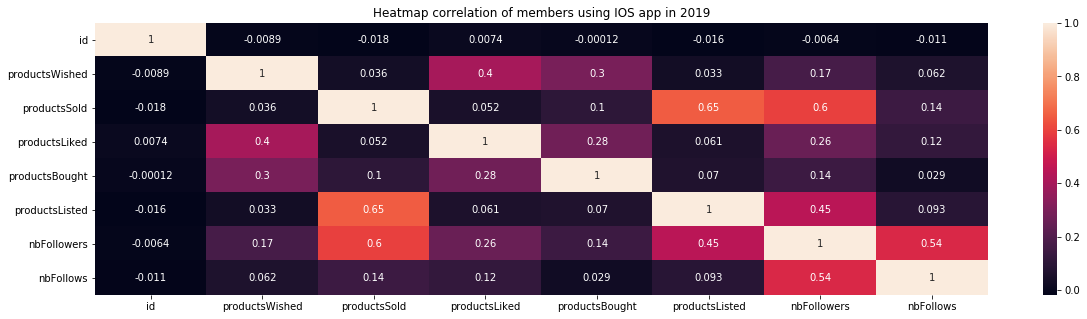

In [224]:
sns.heatmap(ios19.corr(),annot = True)
plt.title('Heatmap correlation of members using IOS app in 2019')

Text(0.5, 1, 'Heatmap correlation of members using IOS app in 2020')

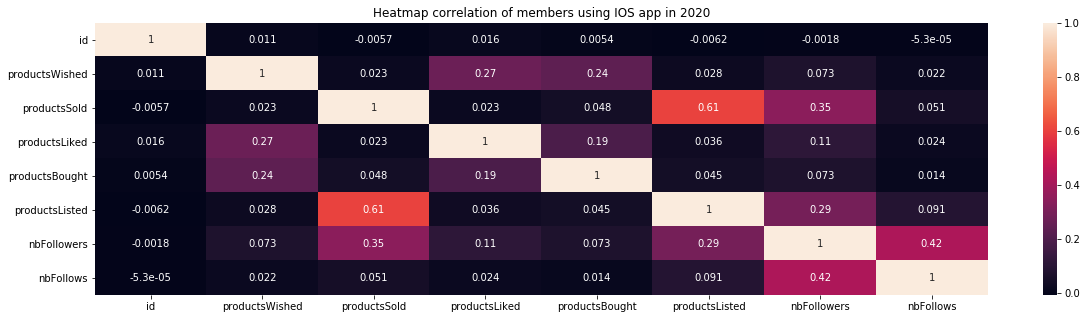

In [225]:
sns.heatmap(ios20.corr(),annot = True)
plt.title('Heatmap correlation of members using IOS app in 2020')

Text(0.5, 1, 'Heatmap correlation of members using website in 2019')

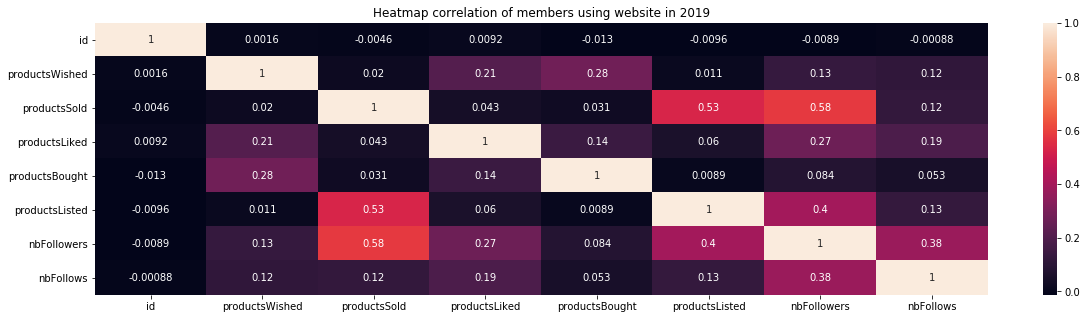

In [226]:
sns.heatmap(web19.corr(),annot = True)
plt.title('Heatmap correlation of members using website in 2019')

Text(0.5, 1, 'Heatmap correlation of members using website in 2020')

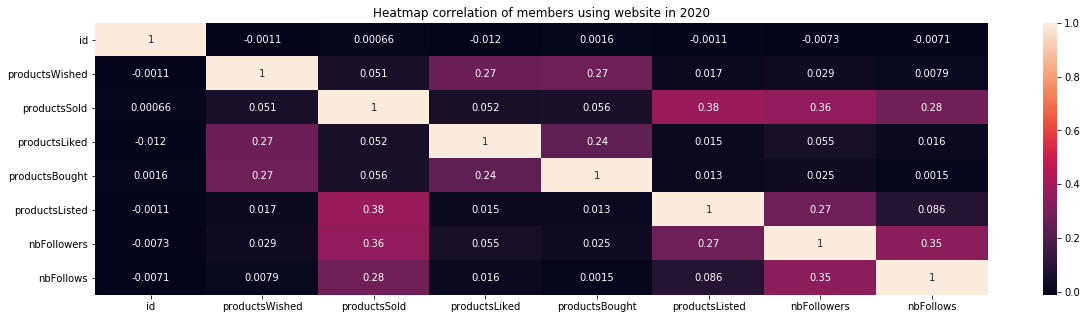

In [227]:
sns.heatmap(web20.corr(),annot = True)
plt.title('Heatmap correlation of members using website in 2020')

Text(0.5, 1, 'Heatmap correlation of members using Andorid app in 2019')

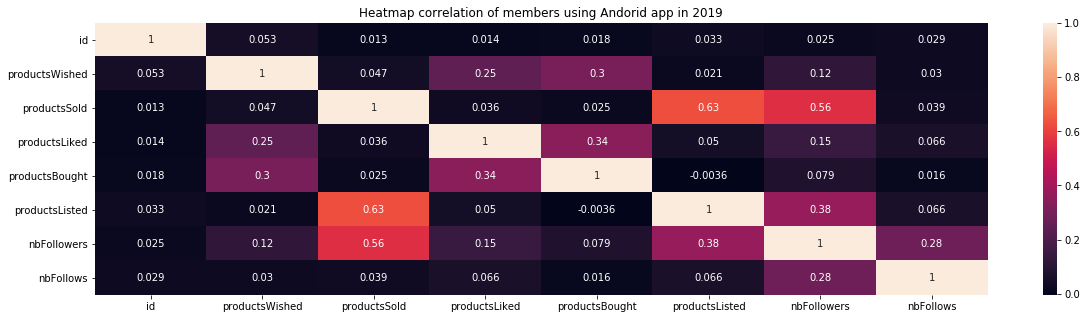

In [228]:
sns.heatmap(droid19.corr(),annot = True)
plt.title('Heatmap correlation of members using Andorid app in 2019')

Text(0.5, 1, 'Heatmap correlation of members using Andorid app in 2020')

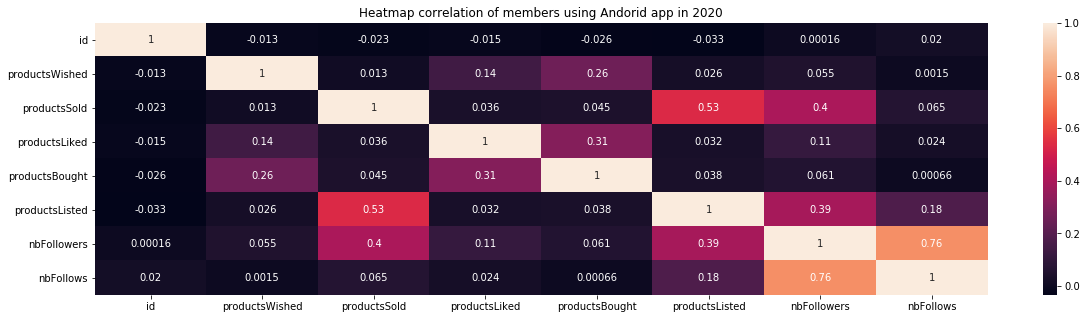

In [229]:
sns.heatmap(droid20.corr(),annot = True)
plt.title('Heatmap correlation of members using Andorid app in 2020')

Text(0.5, 1, 'Heatmap correlation of members using mood feature in 2019')

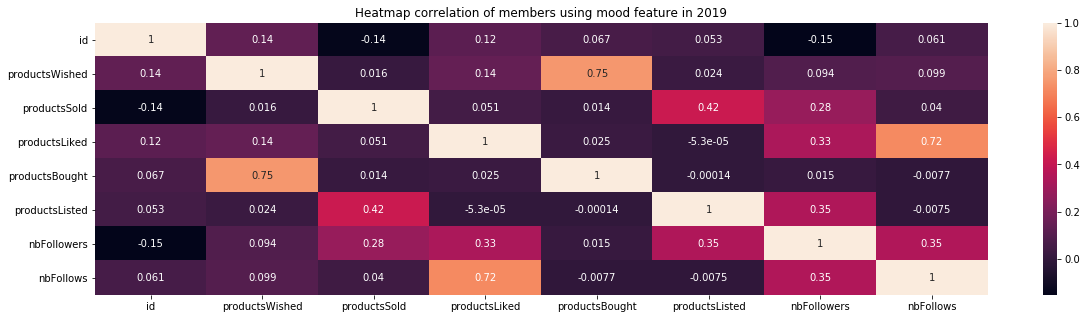

In [230]:
sns.heatmap(mood19.corr(),annot = True)
plt.title('Heatmap correlation of members using mood feature in 2019')

Text(0.5, 1, 'Heatmap correlation of members using mood feature in 2020')

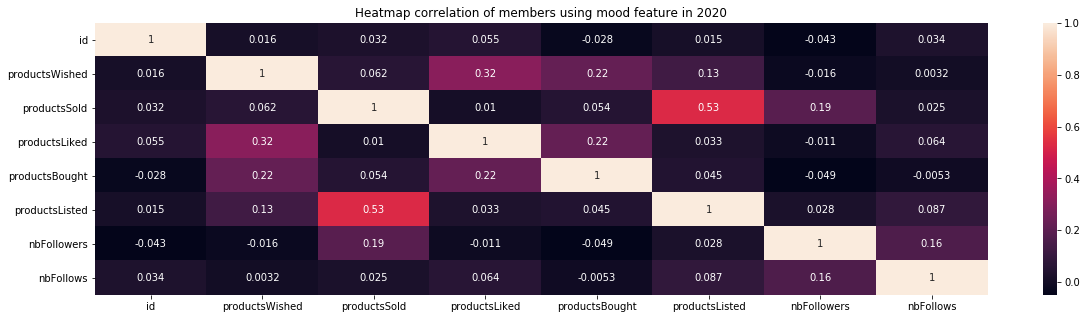

In [197]:
sns.heatmap(mood20.corr(),annot = True)
plt.title('Heatmap correlation of members using mood feature in 2020')

Text(0.5, 1, 'Heatmap correlation of members inputing their birthdate info in 2020')

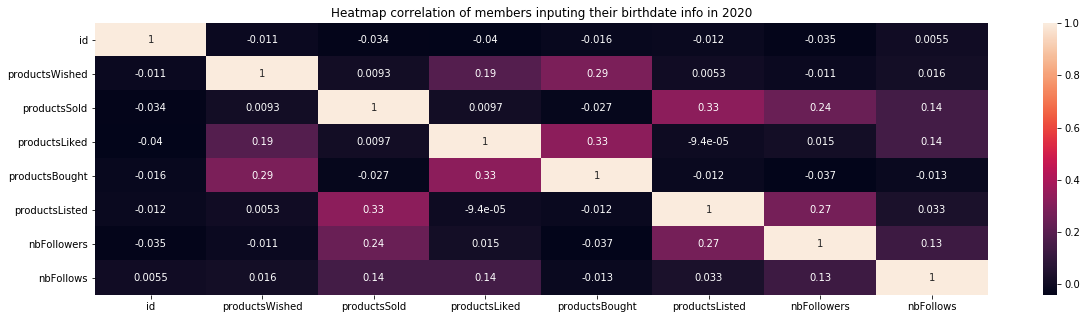

In [198]:
sns.heatmap(birthdate.corr(),annot = True)
plt.title('Heatmap correlation of members inputing their birthdate info in 2020')

Text(0.5, 1, 'Heatmap correlation of members in 2019')

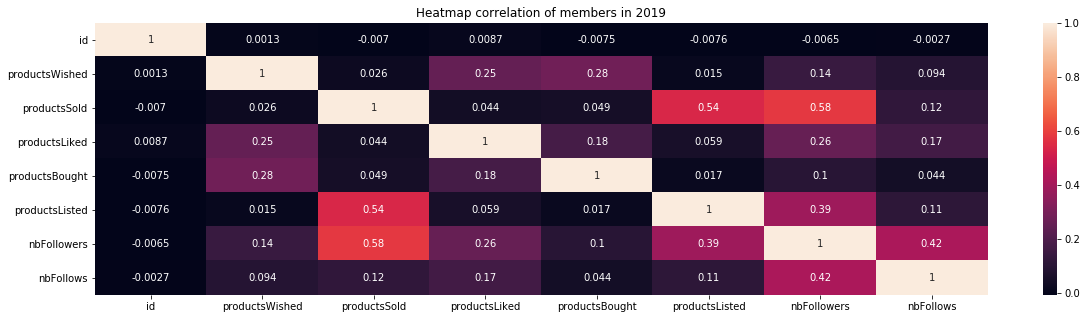

In [205]:
sns.heatmap(members19drop.copy().drop(['segment', 'birthDate'],axis=1).corr(),annot = True)
plt.title('Heatmap correlation of members in 2019')

Text(0.5, 1, 'Heatmap correlation of members in 2020')

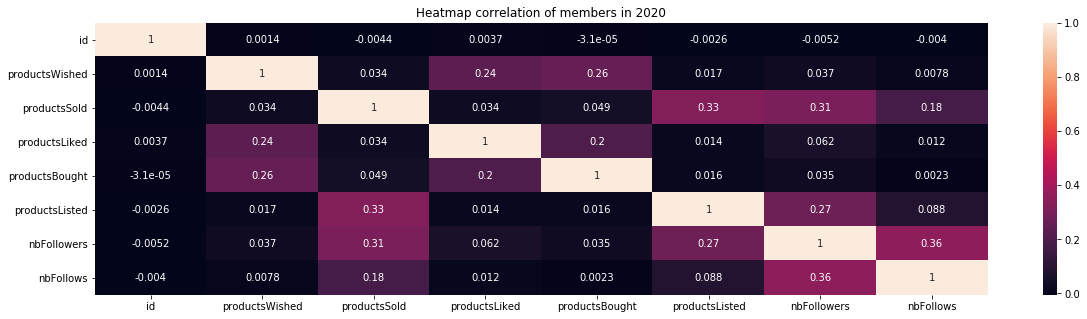

In [200]:
sns.heatmap(df20.corr(),annot = True)
plt.title('Heatmap correlation of members in 2020')

Text(0.5, 1, 'Heatmap correlation of VIP members in 2020')

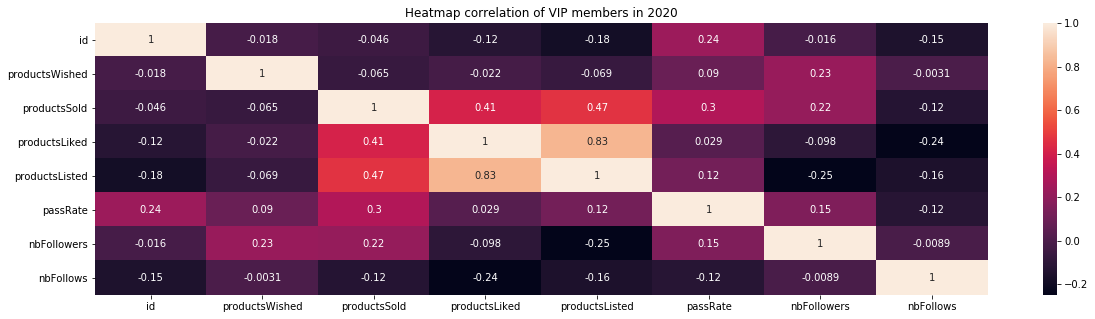

In [201]:
sns.heatmap(VIP.drop(['productsBought'],axis=1).corr(),annot = True)
plt.title('Heatmap correlation of VIP members in 2020')

Text(0.5, 1, 'Heatmap correlation of B2C members in 2020')

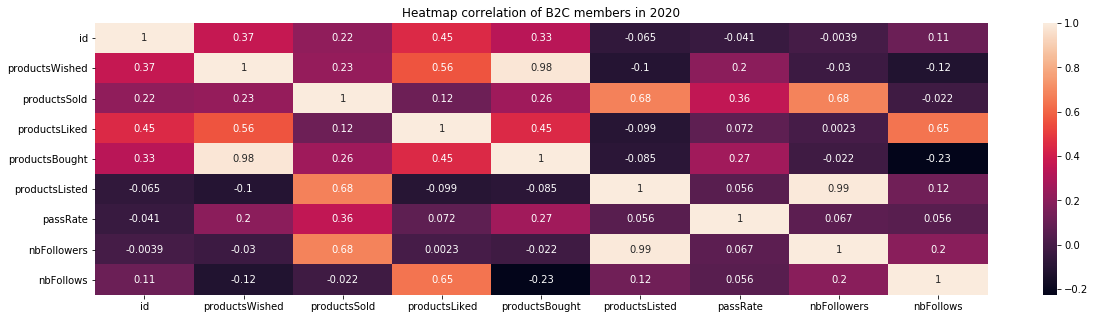

In [202]:
sns.heatmap(B2C.corr(),annot = True)
plt.title('Heatmap correlation of B2C members in 2020')

In [113]:
B2C.describe()

,id,productsWished,productsSold,productsLiked,productsBought,productsListed,nbFollowers,nbFollows
count,1.600000e+01,16.0000,16.000000,16.000000,16.0000,16.000000,16.00000,16.000000
mean,2.347028e+09,0.5625,17.062500,11.187500,0.0625,303.062500,152.31250,8.625000
std,1.062028e+09,1.7500,21.433521,26.146303,0.2500,920.541396,401.62897,3.095696
min,2.966813e+08,0.0000,0.000000,0.000000,0.0000,0.000000,3.00000,6.000000
25%,1.814708e+09,0.0000,3.000000,0.000000,0.0000,4.750000,8.75000,7.000000
50%,2.096300e+09,0.0000,5.000000,0.500000,0.0000,15.500000,24.50000,7.000000
75%,3.390177e+09,0.0000,23.750000,6.000000,0.0000,124.000000,107.75000,8.500000
max,4.052812e+09,7.0000,66.000000,95.000000,1.0000,3731.000000,1641.00000,18.000000


Text(0.5, 1, 'Heatmap correlation of C2C members in 2020')

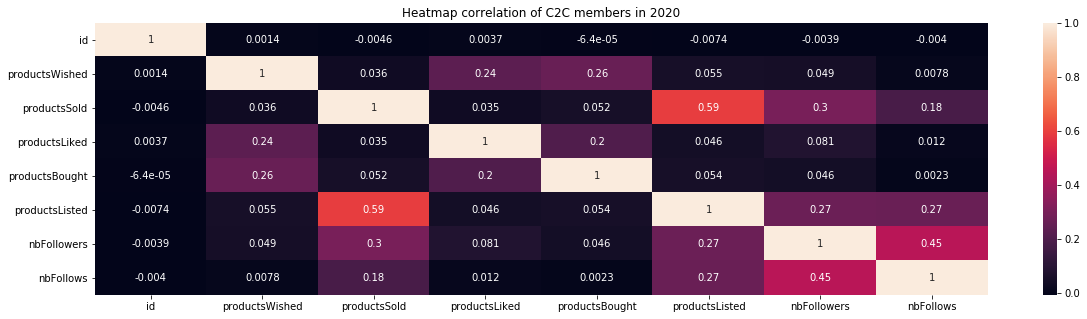

In [203]:
sns.heatmap(C2C.corr(),annot = True)
plt.title('Heatmap correlation of C2C members in 2020')

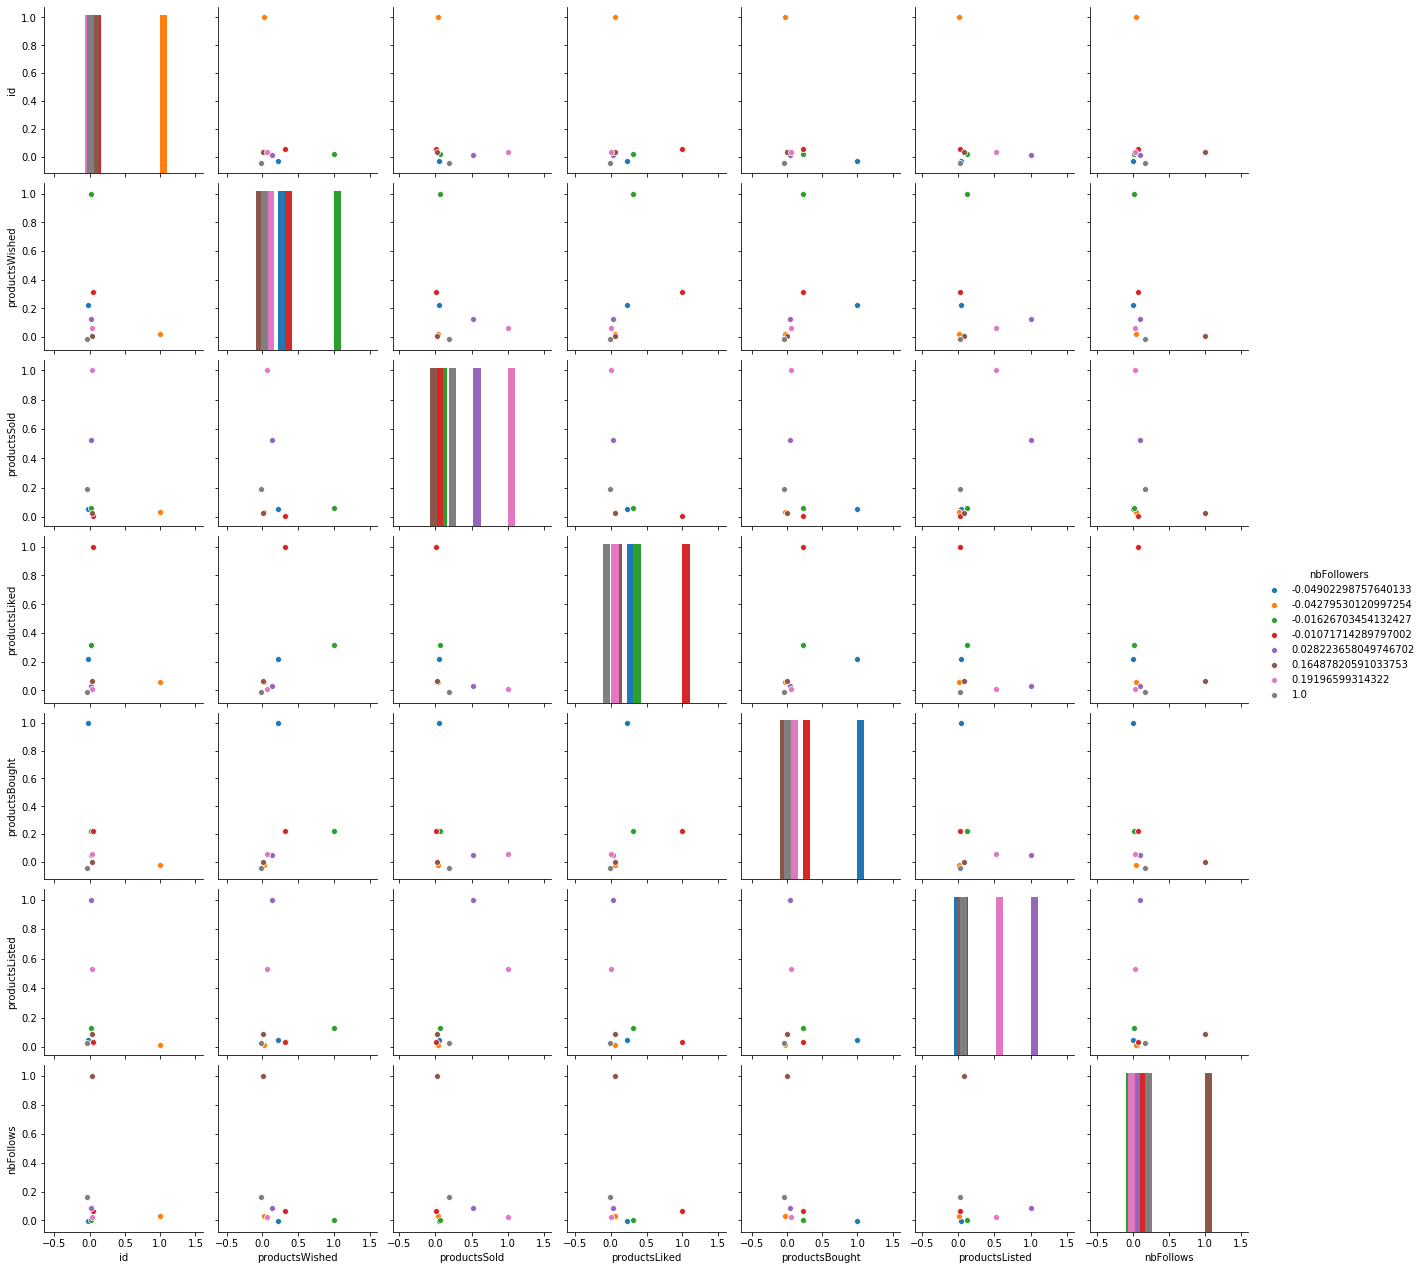

In [236]:
sns.pairplot(mood20.corr(), hue="nbFollowers", diag_kind="hist")

In [237]:
# Filter and bucket segmentation then create dataframe to create visualizations for
# DROP 'segment' -filter out vip and B2C
# DROP 'mood'

# Segment Users by civility, language, country, app, age???
######################### CUSTOMER SEGMENTATION ################
# app users
# civility
### MOST USED LANGUAGE- FOCUS
# language
# age??? Generation : Z, millennial, x,  baby boomers

### LARGEST COUNTRY GROWTH- FOCUS
#  2   country                           36184 non-null  object    COUNT countries in 2019 & 2020: (2020-2019)/2019
#  39  prodsAmountSold                   6368 non-null   float64   SOLD TOTAL

########################## USER STATS ##########################
#  13  productsWished                    36184 non-null  int64     IF >=1 OR PRODUCTLIKED
#  15  productsLiked                     36184 non-null  int64     OR >=1 PRODUCT
#  16  productsBought                    36184 non-null  int64     AND <1
#  17  productsListed                    36184 non-null  int64     OR >=1 THEN USER
#  28  nbFollowers                       65361 non-null  int64  
#  29  nbFollows                         65361 non-null  int64     OR >=1 

########################## BUYER STATS #########################
#  13  productsWished                    36184 non-null  int64 
#  15  productsLiked                     36184 non-null  int64
#  16  productsBought                    36184 non-null  int64     IF >=1 THEN BUYER
#  17  productsListed                    36184 non-null  int64
#  28  nbFollowers                       65361 non-null  int64  
#  29  nbFollows                         65361 non-null  int64

########################## SELLER STATS ########################
#  14  productsSold                      36184 non-null  int64
#  17  productsListed                    36184 non-null  int64     IF >=1 THEN SELLER
#  28  nbFollowers                       65361 non-null  int64     Bucket type of influence
#  29  nbFollows                         65361 non-null  int64
#  36  prodsTotalCount                   6368 non-null   float64   PRODUCTS SOLD / PRODUCTS TOTAL COUNT = SELL THROUGH RATE
#  37  prodsSoldCount                    6368 non-null   float64   Bucket by number of sold- differnt types of seller
#  38  prodsAmountTotal                  6368 non-null   float64   PRODUCTS AMOUNT SOLD / PRODUCTS SOLD COUNT = AVG $ SOLD
#  39  prodsAmountSold                   6368 non-null   float64   Bucket by AVG of sold- differnt types of seller
#  40  likesOnAllProducts                6368 non-null   float64   LIKED ALL PRODUCTS /PRODUCTS TOTAL COUNT = AVG LIKES
#  41  likesOnSoldProducts               6368 non-null   float64   LIKED SOLD PRODUCTS /PRODUCTS SOLD COUNT = AVG SOLD LIKES

In [10]:
df19 = members19drop.copy().fillna('N/A')
df19 = df19.assign(Year='2019')
df19drop = members19drop.copy().drop(['segment', 'birthDate'],axis=1)
df20 = members20drop.copy().fillna('N/A')
df20 = df20.assign(Year='2020')
df = df19.append(df20)
birthdate = members20drop.copy().drop(['mood'],axis=1).dropna()
mood19 = members19drop.copy().drop(['segment', 'birthDate'],axis=1).dropna()
mood20 = members20drop.copy().drop(['birthDate'],axis=1).dropna()
mood = mood19.append(mood20)
ios19 = members19drop[members19drop['has app']=='IOS App'].copy().drop(['segment', 'birthDate'],axis=1)
ios20 = members20drop[members20drop['has app']=='IOS App']
ios = ios19.append(ios20)
web19 = members19drop[members19drop['has app']=='No App'].copy().drop(['segment', 'birthDate'],axis=1)
web20 = members20drop[members20drop['has app']=='No App']
web = web19.append(web20)
droid19 = members19drop[members19drop['has app']=='Android App'].copy().drop(['segment', 'birthDate'],axis=1)
droid20 = members20drop[members20drop['has app']=='Android App']
droid = droid19.append(droid20)
users = df[(df['productsWished'] >=1) | (df['productsLiked'] >=1) | (df['productsListed']>=1) | (df['nbFollows']>=1) & (df['productsBought']<1)]
users19 = users[users['Year'] == '2019']
users20 = users[users['Year'] == '2020']
buyer = df[df['productsBought']>=1]
buyer19 = buyer[buyer['Year'] == '2019']
buyer20 = buyer[buyer['Year'] == '2020']
lister = df[df['productsListed']>=1]
lister19 = lister[lister['Year'] == '2019']
lister20 = lister[lister['Year'] == '2020']
seller = df[df['productsSold']>=1]
seller19 = seller[seller['Year'] == '2019']
seller20 = seller[seller['Year'] == '2020']
VIP = members20drop[members20drop['segment']=='VIP']
B2C = members20drop[members20drop['segment']=='B2C']
C2C = members20drop[members20drop['segment']=='C2C']
males = df[df['civility'] == 'mr']
males19 = males[males['Year'] == '2019'] 
males20 = males[males['Year'] == '2020']
females = df[(df['civility'] == 'mrs') | (df['civility'] == 'miss')]
females19 = females[females['Year'] == '2019']
females20 = females[females['Year'] == '2020']

In [ ]:
# df19 = members19drop.copy().fillna('N/A')
# df19 = df19.assign(Year='2019')
# df19drop = members19drop.copy().drop(['segment', 'birthDate'],axis=1)
# df20 = members20drop.copy().fillna('N/A')
# df20 = df20.assign(Year='2020')
# df = df19.append(df20)
# birthdate = members20drop.copy().drop(['mood'],axis=1).dropna()
# mood19 = members19drop.copy().drop(['segment', 'birthDate'],axis=1).dropna()
# mood20 = members20drop.copy().drop(['birthDate'],axis=1).dropna()
# mood = mood19.append(mood20)
# ios19 = members19drop[members19drop['has app']=='IOS App'].copy().drop(['segment', 'birthDate'],axis=1)
# ios20 = members20drop[members20drop['has app']=='IOS App']
# ios = ios19.append(ios20)
# web19 = members19drop[members19drop['has app']=='No App'].copy().drop(['segment', 'birthDate'],axis=1)
# web20 = members20drop[members20drop['has app']=='No App']
# web = web19.append(web20)
# droid19 = members19drop[members19drop['has app']=='Android App'].copy().drop(['segment', 'birthDate'],axis=1)
# droid20 = members20drop[members20drop['has app']=='Android App']
# droid = droid19.append(droid20)
# buyers = df[(df['productsBought']>=1) & (df['productsSold']<1)]
# buyers19 = buyers[buyers['Year'] == '2019']
# buyers20 = buyers[buyers['Year'] == '2020']
# listers = df[df['productsListed']>=1]
# listers19 = listers[listers['Year'] == '2019']
# listers20 = listers[listers['Year'] == '2020']
# sellers = df[df['productsSold']>=1]
# sellers19 = sellers[sellers['Year'] == '2019']
# sellers20 = sellers[sellers['Year'] == '2020']
# VIP = members20drop[members20drop['segment']=='VIP']
# B2C = members20drop[members20drop['segment']=='B2C']
# C2C = members20drop[members20drop['segment']=='C2C']
# males = df[df['civility'] == 'mr']
# males19 = males[males['Year'] == '2019'] 
# males20 = males[males['Year'] == '2020']
# females = df[(df['civility'] == 'mrs') | (df['civility'] == 'miss')]
# females19 = females[females['Year'] == '2019']
# females20 = females[females['Year'] == '2020']
# users = df[(df['Activity Dif'] == 0) & (df['User Activity'] != 0)]
# users19 = users[users['Year'] == '2019']
# users20 = users[users['Year'] == '2020']
# browsers = df[df['Member Type'] == 'Browser']
# browsers19 = browsers[browsers['Year'] == '2019']
# browsers20 = browsers[browsers['Year'] == '2020']
# activity = df.copy().drop(['id', 'country', 'Language', 'civility', 
#                            'App', 'Year'],axis=1)

In [258]:
# whats behaviors can sellers leverage for increased revenue

In [372]:
activity = df.drop(['id', 'country', 'language', 'mood', 'civility', 
                    'birthDate', 'has app', 'Year', 'has app (0 or 1)', 'segment'],axis=1)
activity.describe()

,productsWished,productsSold,productsLiked,productsBought,productsListed,nbFollowers,nbFollows
count,101545.000000,101545.000000,101545.000000,101545.000000,101545.000000,101545.000000,101545.000000
mean,4.277178,0.258506,17.124378,0.495465,0.696361,5.065419,10.181624
std,27.545637,2.153380,91.165571,2.206323,13.521654,24.018284,305.155714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,7.000000
50%,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,7.000000
75%,1.000000,0.000000,11.000000,0.000000,0.000000,4.000000,8.000000
max,2060.000000,163.000000,10795.000000,144.000000,3731.000000,2409.000000,94119.000000


In [358]:
activity.sum().head()

productsWished     434326
productsSold        26250
productsLiked     1738895
productsBought      50312
productsListed      70712
dtype: object

In [380]:
activity.columns
activity.shape

(101545, 13)

In [383]:
x = ['productsWished', 'productsSold', 'productsLiked', 'productsBought',
       'productsListed', 'nbFollowers', 'nbFollows']
activity[activity[x]>="1"]

TypeError: Invalid comparison between dtype=int64 and str

In [263]:
(len(females19)/len(females20))/len(females19)

1.824418010654601e-05

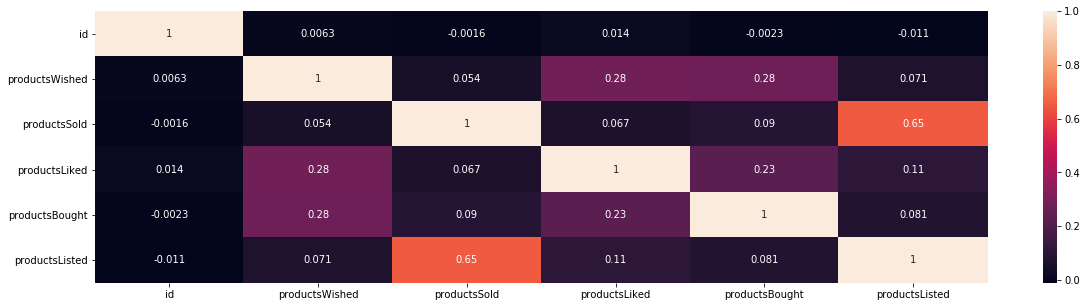

In [313]:
sns.heatmap(users[(users['productsWished']>=1) & (users['productsLiked']>=1)].drop(['nbFollowers', 'nbFollows'], axis=1).corr(), annot=True)

In [342]:
sns.heatmap(users.drop(['nbFollowers', 'nbFollows'], axis=1).sum().corr(), annot=True)

TypeError: corr() missing 1 required positional argument: 'other'

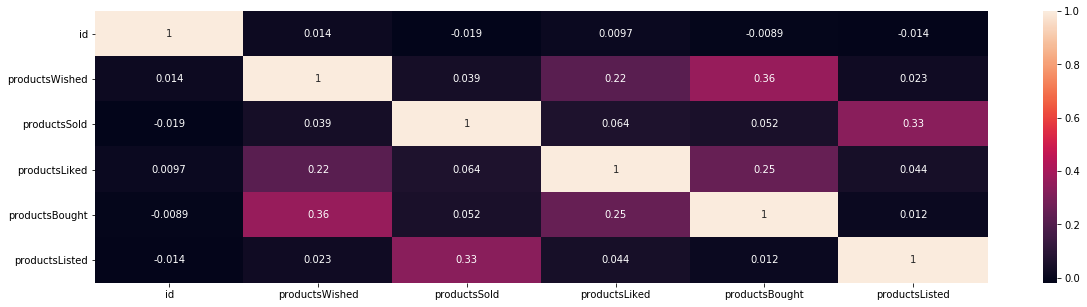

In [300]:
sns.heatmap(seller.drop(['nbFollowers', 'nbFollows'], axis=1).corr(), annot=True)

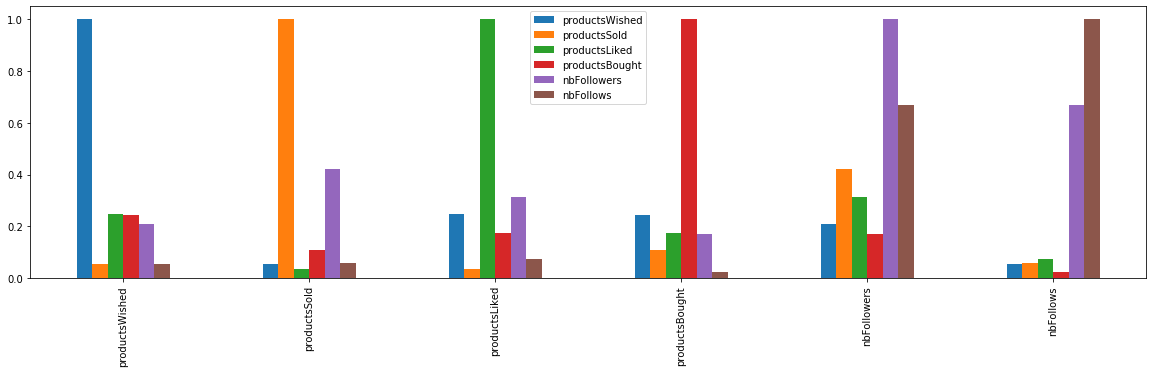

In [350]:
buyer[(buyer['productsWished']>=10) | (buyer['productsLiked']>=10) & 
                  (buyer['has app']== 'IOS App') & (buyer['civility']== 'mrs') | (buyer['civility']== 'miss') & 
                  (buyer['language']== 'german') & (buyer['country']== 'France') &
                  (buyer['Year']== '2019')].drop(['id', 'productsListed'], 
                                                 axis=1).corr().plot(kind='bar')

In [349]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df['has app (0 or 1)'], df['productsBought'])

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [345]:
# (0 or 1)
# def f(column):
#     if column['has app'] == 'IOS App' :
#         val = '1'
#     elif column['has app'] == 'Android App' :
#         val = '1'
#     else:
#         val = '0'
#     return val
# df['has app (0 or 1)'] = df.apply(f, axis=1)

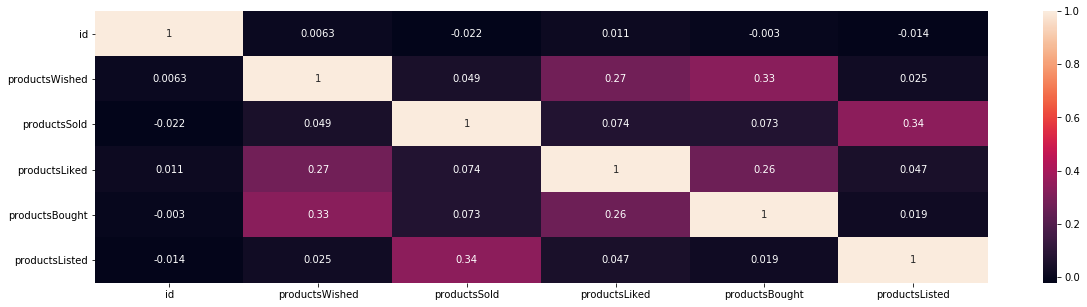

In [298]:
sns.heatmap(lister.drop(['nbFollowers', 'nbFollows'], axis=1).corr(), annot=True)

In [272]:
females.columns

Index(['id', 'country', 'language', 'mood', 'civility', 'birthDate',
       'productsWished', 'productsSold', 'productsLiked', 'productsBought',
       'productsListed', 'nbFollowers', 'nbFollows', 'segment',
       'prodsTotalCount', 'prodsSoldCount', 'prodsAmountTotal',
       'prodsAmountSold', 'likesOnAllProducts', 'likesOnSoldProducts',
       'has app', 'Year'],
      dtype='object')

In [276]:
# femalescountry = females.groupby(['country'])
# femalescountry = females.groupby(['country']).sum().sort_values(ascending=True).head(10)
# femalescountry.plot(kind='barh', figsize=(15,12))
females[females['country', 'productsLiked']].pairplot()

KeyError: ('country', 'productsLiked')

In [247]:
# users = df[(df['productsWished'] >=1) | (df['productsLiked'] >=1) | (df['productsListed']>=1) | (df['nbFollows']>=1) & (df['productsBought']<1)]
# buyer = df[df['productsBought']>=1]
# lister = df[df['productsListed']>=1]
# seller = df[df['productsSold']>=1]

In [213]:
# 0.9526219902506278% are users
len(users)/len(df)
# 96734

0.9526219902506278

In [238]:
# 0.21688906396179033% are buyer
len(buyer)/len(df)
# 22024

0.21688906396179033

In [217]:
# 0.06460190063518637 are sellers
len(seller)/len(df)
# 6560

0.06460190063518637

In [248]:
# buyer = df[df['productsBought']>=1]
# buyer19 = buyer[buyer['Year']== '2019']
# buyer.shape
# buyer19.shape

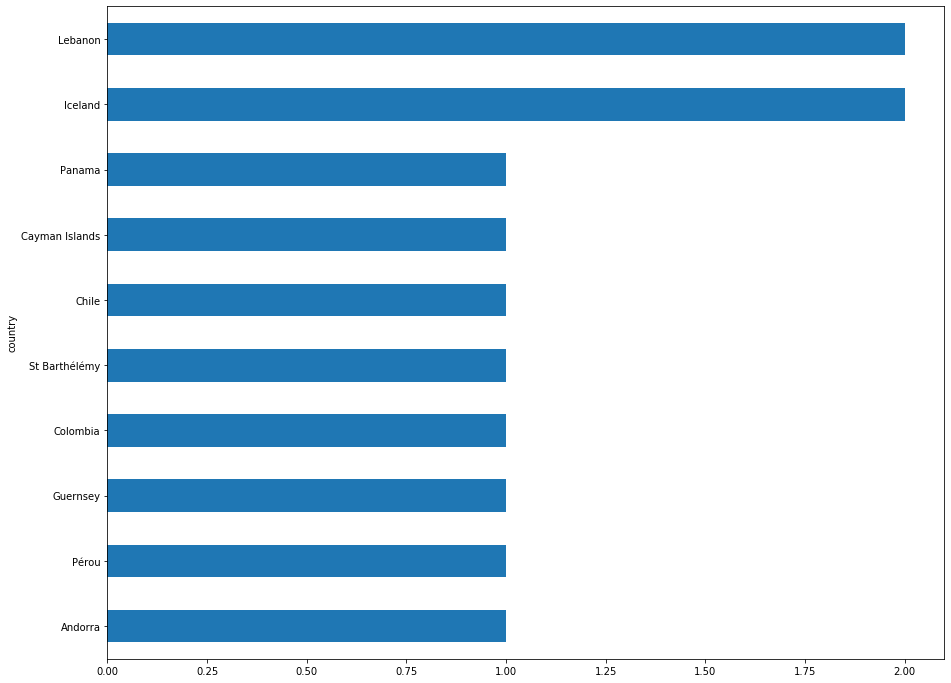

In [233]:
buyingcountries = buyer.groupby(['country'])["productsBought"].sum().sort_values(ascending=True).head(10)
buyingcountries.plot(kind='barh', figsize=(15,12))

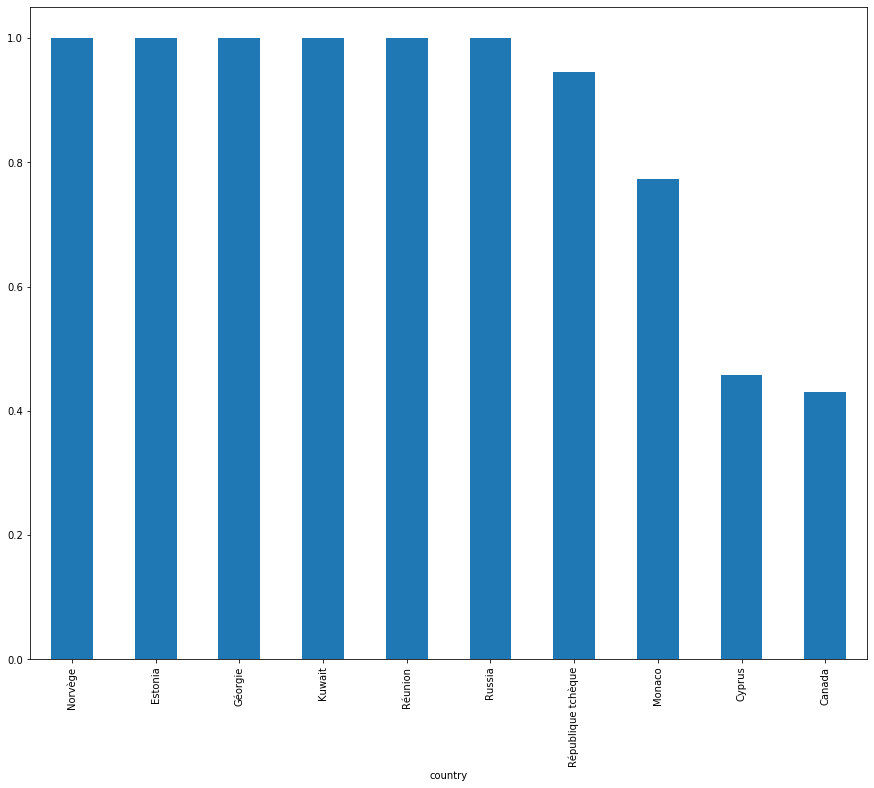

In [234]:
buyingcountries = buyer.groupby(['country'])["productsBought"].sum().sort_values(ascending=True)
buyingcountries19 = buyer[buyer['Year']=='2019'].groupby(['country'])["productsListed"].sum()
buyingcountries20 = buyer[buyer['Year']=='2020'].groupby(['country'])["productsListed"].sum()
buyergrowth = ((buyingcountries19 - buyingcountries20)/buyingcountries19).sort_values(ascending=False).dropna().head(10)
buyergrowth.plot(kind='bar', figsize=(15,12))

In [232]:
userscountries19 = users[users['Year']=='2019'].groupby(['country']).count_values()
userscountries20 = users[users['Year']=='2020'].groupby(['country']).count_values()
usersgrowth = ((userscountries19 - userscountries20)/userscountries19).sort_values(ascending=True).head(10)
# .dropna()
usersgrowth.plot(kind='barh', figsize=(15,12))

AttributeError: 'DataFrameGroupBy' object has no attribute 'count_values'

In [257]:
# lister = df[df['productsListed']>=1]
# lister.shape

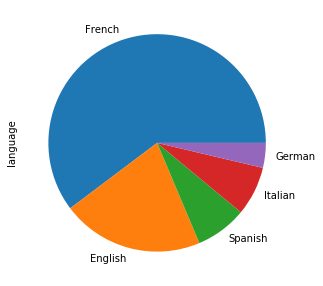

In [282]:
df['language'].value_counts().plot.pie(labels=df['language'].unique())

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

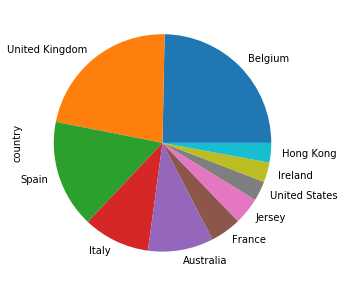

In [287]:
df['country'].value_counts().head(10).plot.pie(labels=df['country'].unique())
plt.labels(df['country'].value_counts())

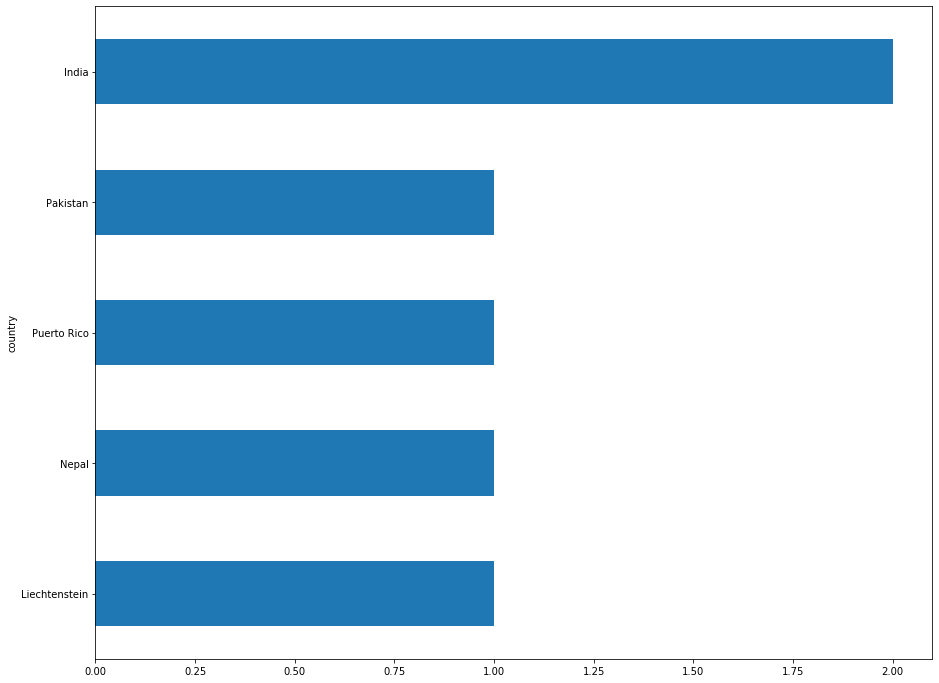

In [249]:
listingcountires = lister.groupby(['country'])["productsListed"].sum().sort_values(ascending=True).dropna().head()
listingcountires.plot(kind='barh', figsize=(15,12))

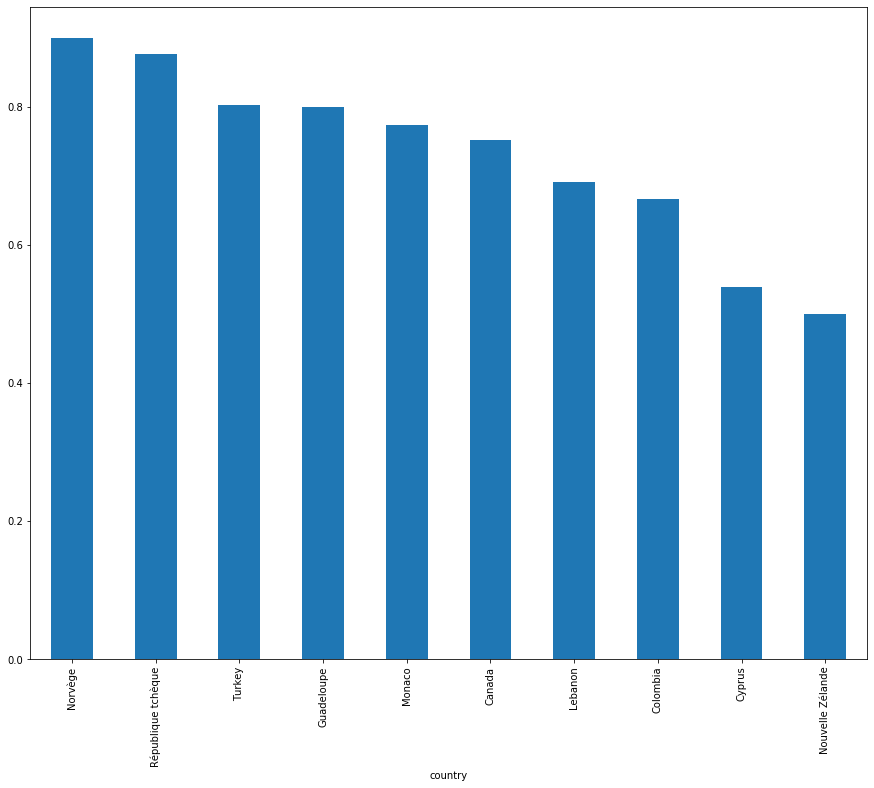

In [251]:
listcountires = lister.groupby(['country'])["productsSold"].sum().sort_values(ascending=True)
listcountires19 = lister[lister['Year']=='2019'].groupby(['country'])["productsListed"].sum()
listcountires20 = lister[lister['Year']=='2020'].groupby(['country'])["productsListed"].sum()
listergrowth = ((listcountires19 - listcountires20)/listcountires19).sort_values(ascending=False).dropna().head(10)
listergrowth.plot(kind='bar', figsize=(15,12))

In [256]:
# seller = df[df['productsSold']>=1]
# seller.shape

In [16]:
sellercountires = seller.groupby(['country'])["productsSold"].sum().sort_values(ascending=True)
sellercountires19 = seller[seller['Year']=='2019'].groupby(['country'])["productsSold"].sum()
sellercountires20 = seller[seller['Year']=='2020'].groupby(['country'])["productsSold"].sum()
sellergrowth = ((sellercountires19 - sellercountires20)/sellercountires19).sort_values(ascending=False).dropna()
# sellergrowth.head().plot(kind='bar', figsize=(15,12))

In [17]:
rateofgrowth = (70/sellergrowth)
print(rateofgrowth)

country
Azerbaïdjan              71.707317
Monaco                   74.444444
Turkey                   84.848485
Canada                   89.864865
République tchèque       90.740741
Cyprus                   94.285714
Taiwan                  140.000000
Lebanon                 140.000000
United States           151.592357
Russia                  154.000000
Estonia                 175.000000
Émirats arabes unis     210.000000
United Kingdom          244.652318
Slovénie                490.000000
Australia              1110.000000
Hong Kong              1135.000000
France                 2325.671642
Luxembourg                     inf
Israel                         inf
Switzerland           -4130.000000
Poland                -3080.000000
Denmark               -1085.000000
Singapore              -560.000000
Finland                -430.000000
Spain                  -354.038462
Malta                  -280.000000
Italy                  -199.850615
Germany                -168.678414
Malaysia    